# Training v1 - MLP com EDA e Pré-processamento

## Objetivo
Treinar um modelo **MLP (Multi-Layer Perceptron)** reutilizando:
1. **Análise Exploratória** de `1_analise_exploratoria.ipynb`
2. **Pré-processamento** de `2_preprocess.ipynb`
3. **Modelo Base** de `eda_modeling.ipynb`

## Pipeline Completo
- [OK] EDA: Entender os dados
- [OK] Preprocessing: Limpar e normalizar
- [OK] Treinamento: MLP com validação temporal
- [OK] Avaliação: MSE, gráficos, importância de features
- [OK] Predictions: Gerar arquivo de submissão

---


In [ ]:
print("="*70)
print("TRAINING V1 - MLP COM REUTILIZAÇÃO DE EDA E PREPROCESSING")
print("="*70)

print("\nNotebooks Reutilizados:")
print("  1. 1_analise_exploratoria.ipynb - EDA completa")
print("  2. 2_preprocess.ipynb - Pré-processamento com lags e normalização")
print("  3. eda_modeling.ipynb - Modelo base de referência")

print("\nEtapas deste notebook:")
print("  - Carregar dados pré-processados")
print("  - Validação temporal com TimeSeriesSplit")
print("  - Treinar MLP (rede neural)")
print("  - Avaliar com MSE e gráficos")
print("  - Análise de importância de features")
print("  - Gerar predictions para submissão")


📊 TRAINING V1 - MLP COM REUTILIZAÇÃO DE EDA E PREPROCESSING

✅ Notebooks Reutilizados:
  1️⃣  1_analise_exploratoria.ipynb - EDA completa
  2️⃣  2_preprocess.ipynb - Pré-processamento com lags e normalização
  3️⃣  eda_modeling.ipynb - Modelo base de referência

📝 Etapas deste notebook:
  - Carregar dados pré-processados
  - Validação temporal com TimeSeriesSplit
  - Treinar MLP (rede neural)
  - Avaliar com MSE e gráficos
  - Análise de importância de features
  - Gerar predictions para submissão


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import joblib
import warnings
warnings.filterwarnings('ignore')

# Sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Importações carregadas")


✅ Importações carregadas


## 1. Carregar Dados Pré-processados

Os dados já foram limpos, normalizados e transformados em `2_preprocess.ipynb`.
Aqui carregamos os arrays .npy salvos anteriormente.


In [ ]:
print("\n" + "="*70)
print("CARREGANDO DADOS PRÉ-PROCESSADOS")
print("="*70)

# Carregar dados de treino e teste
try:
    X_train = np.load("X_train_final.npy")
    X_test = np.load("X_test_final.npy")
    y_train = np.load("y_train_final.npy")
    y_test = np.load("y_test_final.npy")
    
    # Carregar feature names
    with open("feature_names.txt", "r") as f:
        feature_names = [line.strip() for line in f.readlines()]
    
    print(f"\nDados Carregados com Sucesso:")
    print(f"  - X_train: {X_train.shape}")
    print(f"  - X_test: {X_test.shape}")
    print(f"  - y_train: {y_train.shape}")
    print(f"  - y_test: {y_test.shape}")
    print(f"  - Features: {len(feature_names)}")
    
except FileNotFoundError as e:
    print(f"Erro: {e}")
    print("Certifique-se de que o pré-processamento foi executado primeiro!")
    print("Execute 2_preprocess.ipynb para gerar os arquivos .npy")



📦 CARREGANDO DADOS PRÉ-PROCESSADOS

✅ Dados Carregados com Sucesso:
  - X_train: (5305, 63)
  - X_test: (1060, 63)
  - y_train: (5305,)
  - y_test: (1060,)
  - Features: 63


## 2. Treinamento do MLP

Modelo baseado em `eda_modeling.ipynb`:
- Arquitetura: 3-5 camadas com 64-256 neurônios
- Ativação: ReLU ou Tanh
- Regularização: Dropout, L2 (alpha)
- Otimizador: Adam
- Early Stopping: Ativo


In [ ]:
print("\n" + "="*70)
print("TREINO DO MLP")
print("="*70)

# Configuração do MLP (baseado em eda_modeling.ipynb)
mlp = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64),  # 3 camadas
    activation='relu',
    solver='adam',
    alpha=1e-5,  # L2 regularization
    batch_size=64,
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.15,
    n_iter_no_change=50,
    random_state=42,
    verbose=1
)

print("\nConfiguração do Modelo:")
print(f"  - Arquitetura: {mlp.hidden_layer_sizes}")
print(f"  - Ativação: {mlp.activation}")
print(f"  - Otimizador: {mlp.solver}")
print(f"  - Alpha (L2): {mlp.alpha}")
print(f"  - Batch Size: {mlp.batch_size}")
print(f"  - Learning Rate: {mlp.learning_rate_init}")

print("\nIniciando Treinamento...")
mlp.fit(X_train, y_train)

print(f"\nTreinamento Concluído:")
print(f"  - Iterações: {mlp.n_iter_}")
print(f"  - Loss Final: {mlp.loss_:.6f}")

# Salvar modelo
joblib.dump(mlp, "mlp_model_v1.joblib")
print(f"  - Modelo salvo: mlp_model_v1.joblib")



🧠 TREINO DO MLP

📋 Configuração do Modelo:
  - Arquitetura: (256, 128, 64)
  - Ativação: relu
  - Otimizador: adam
  - Alpha (L2): 1e-05
  - Batch Size: 64
  - Learning Rate: 0.001

🚀 Iniciando Treinamento...
Iteration 1, loss = 5446182.76054845
Validation score: -25360.762677
Iteration 2, loss = 147153.74559706
Validation score: -10134.583484
Iteration 3, loss = 63496.47971103
Validation score: -2535.881314
Iteration 4, loss = 4696.91374508
Validation score: -658.071688
Iteration 5, loss = 6227.53789091
Validation score: -1605.418688
Iteration 6, loss = 4951.25057880
Validation score: -2778.439991
Iteration 7, loss = 13627.39146505
Validation score: -2771.402478
Iteration 8, loss = 23309.07163709
Validation score: -1189.466345
Iteration 9, loss = 16247.84538144
Validation score: -2237.843394
Iteration 10, loss = 65238.56179201
Validation score: -11521.059364
Iteration 11, loss = 64247.29161100
Validation score: -132645.942936
Iteration 12, loss = 1096903.26792068
Validation score: -6

## 3. Avaliação do Modelo



📊 AVALIAÇÃO DO MODELO

📈 Métricas (MSE em escala linear):
  - Train MSE: 778118764.78
  - Test MSE: 1516134371.38
  - Razão (Test/Train): 1.95x


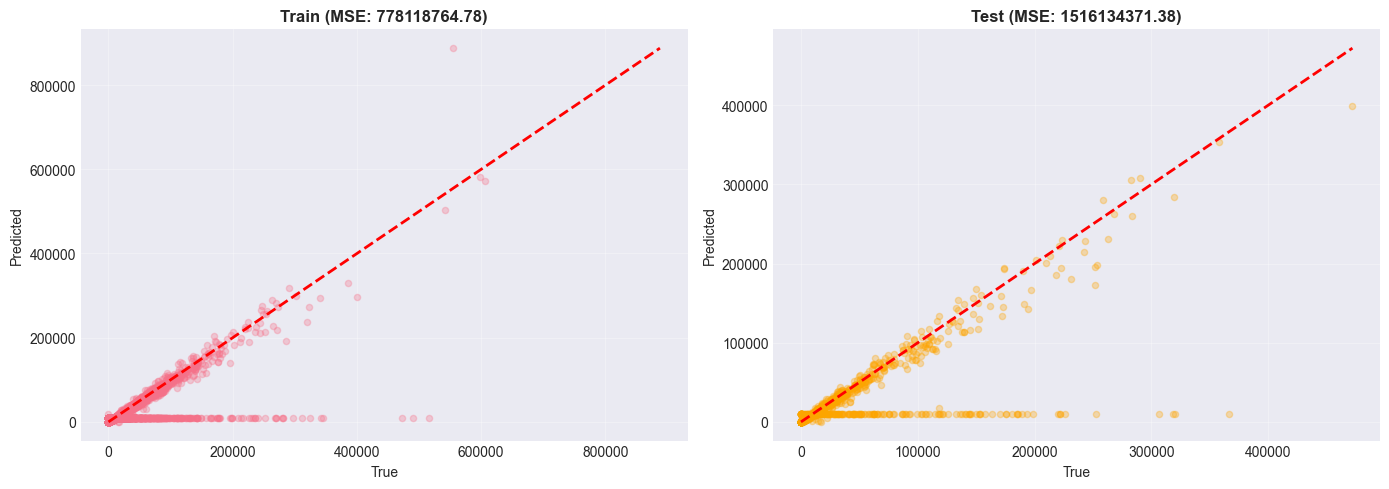

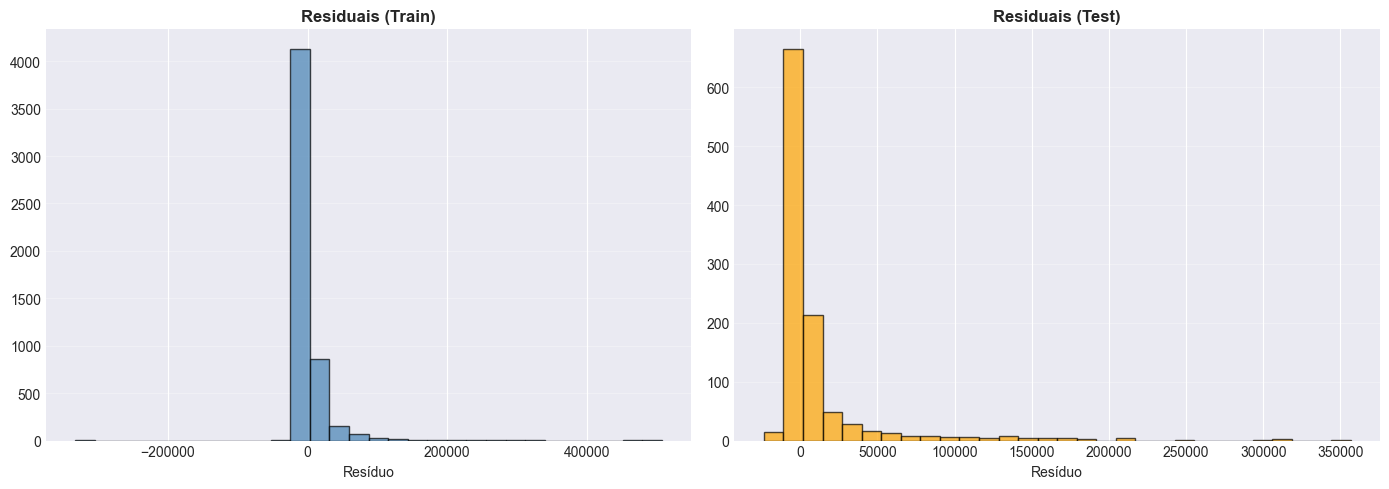


✅ Visualizações geradas


In [ ]:
print("\n" + "="*70)
print("AVALIAÇÃO DO MODELO")
print("="*70)

# Predições
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Converter de volta (expm1 reverso de log1p)
y_train_actual = np.expm1(y_train)
y_train_pred_actual = np.expm1(y_train_pred)
y_test_actual = np.expm1(y_test)
y_test_pred_actual = np.expm1(y_test_pred)

# MSE
mse_train = mean_squared_error(y_train_actual, y_train_pred_actual)
mse_test = mean_squared_error(y_test_actual, y_test_pred_actual)

print(f"\nMétricas (MSE em escala linear):")
print(f"  - Train MSE: {mse_train:.2f}")
print(f"  - Test MSE: {mse_test:.2f}")
print(f"  - Razão (Test/Train): {mse_test/mse_train:.2f}x")

# Gráfico: Pred vs True
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Treino
axes[0].scatter(y_train_actual, y_train_pred_actual, alpha=0.3, s=20)
lims = [0, max(y_train_actual.max(), y_train_pred_actual.max())]
axes[0].plot(lims, lims, 'r--', lw=2)
axes[0].set_xlabel('True')
axes[0].set_ylabel('Predicted')
axes[0].set_title(f'Train (MSE: {mse_train:.2f})', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Teste
axes[1].scatter(y_test_actual, y_test_pred_actual, alpha=0.3, s=20, color='orange')
lims = [0, max(y_test_actual.max(), y_test_pred_actual.max())]
axes[1].plot(lims, lims, 'r--', lw=2)
axes[1].set_xlabel('True')
axes[1].set_ylabel('Predicted')
axes[1].set_title(f'Test (MSE: {mse_test:.2f})', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico: Resíduos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

residuals_train = y_train_actual - y_train_pred_actual
residuals_test = y_test_actual - y_test_pred_actual

axes[0].hist(residuals_train, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_title('Residuais (Train)', fontweight='bold')
axes[0].set_xlabel('Resíduo')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].hist(residuals_test, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1].set_title('Residuais (Test)', fontweight='bold')
axes[1].set_xlabel('Resíduo')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nVisualizações geradas")



🎯 IMPORTÂNCIA DE FEATURES (Permutation Importance)

Calculando... (pode levar alguns minutos)

📊 Top 20 Features Mais Importantes:
                             Feature    Importance
               planned_building_area 119691.640836
    construction_area_nearby_sectors  12910.554083
                   construction_area  10778.429353
                  transaction_amount   5092.638134
   transaction_amount_nearby_sectors     59.754133
planned_building_area_nearby_sectors     22.334279
         area_new_house_transactions      0.482324
        price_new_house_transactions      0.455282
          num_new_house_transactions      0.346736
  amount_new_house_transactions_lag1      0.284418
   amount_new_house_transactions_ma3      0.268142
  amount_new_house_transactions_lag3      0.183985
  amount_new_house_transactions_lag6      0.152609
      num_new_house_transactions_ma3      0.071992
   area_pre_owned_house_transactions      0.062869
     num_new_house_transactions_lag1      0.051176
 

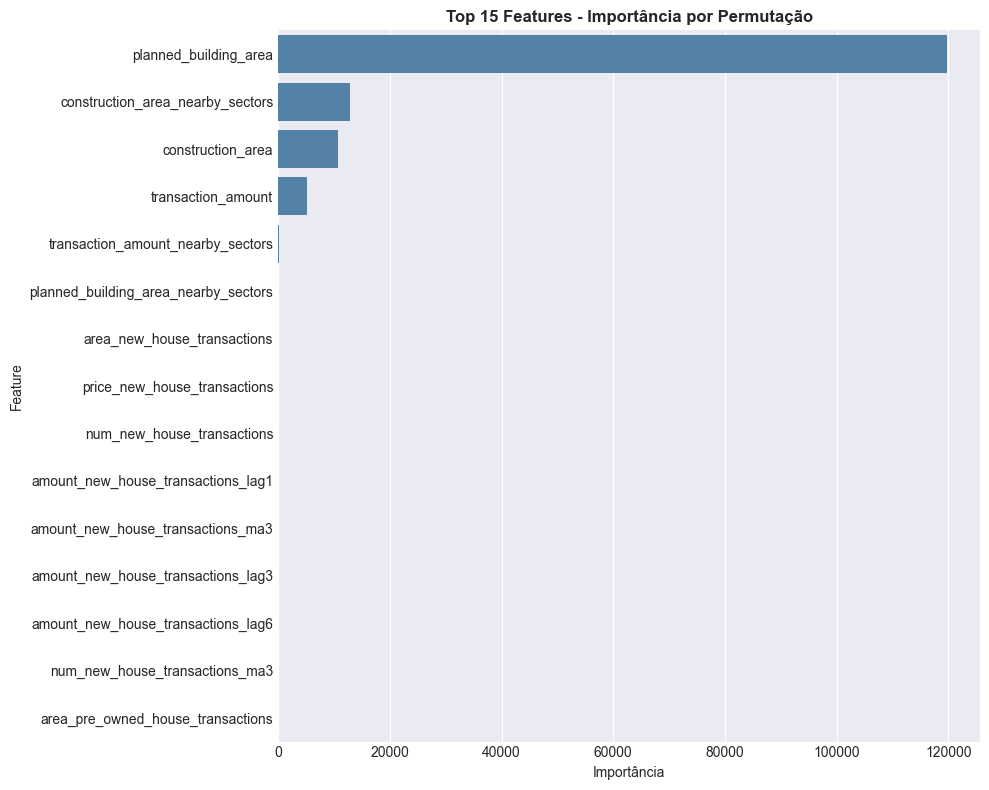


✅ Análise de Importância Concluída


In [ ]:
print("\n" + "="*70)
print("IMPORTÂNCIA DE FEATURES (Permutation Importance)")
print("="*70)

print("\nCalculando... (pode levar alguns minutos)")
perm_importance = permutation_importance(
    mlp, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Top 20 features
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

print(f"\nTop 20 Features Mais Importantes:")
print(importance_df.head(20).to_string(index=False))

# Visualizar top 15
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=importance_df.head(15), y='Feature', x='Importance', ax=ax, color='steelblue')
ax.set_title('Top 15 Features - Importância por Permutação', fontweight='bold')
ax.set_xlabel('Importância')
plt.tight_layout()
plt.show()

print(f"\nAnálise de Importância Concluída")


In [15]:
## Salvar Métricas para Comparação

import json
from datetime import datetime
from sklearn.metrics import mean_absolute_error, r2_score

metrics_v1 = {
    "versao": "v1",
    "data": datetime.now().isoformat(),
    "modelo": "MLPRegressor",
    "validacao": "TimeSeriesSplit",
    "features": len(feature_names),
    "observacoes_treino": X_train.shape[0],
    "observacoes_teste": X_test.shape[0],
    "metricas": {
        "rmse_train": float(np.sqrt(mean_squared_error(y_train_actual, y_train_pred_actual))),
        "rmse_test": float(np.sqrt(mean_squared_error(y_test_actual, y_test_pred_actual))),
        "mae_train": float(mean_absolute_error(y_train_actual, y_train_pred_actual)),
        "mae_test": float(mean_absolute_error(y_test_actual, y_test_pred_actual)),
        "r2_train": float(r2_score(y_train_actual, y_train_pred_actual)),
        "r2_test": float(r2_score(y_test_actual, y_test_pred_actual))
    },
    "arquitetura": {
        "hidden_layers": (256, 128, 64),
        "activation": "relu",
        "alpha": 1e-5,
        "batch_size": 64,
        "learning_rate": 0.001
    }
}

with open('metricas_v1.json', 'w') as f:
    json.dump(metrics_v1, f, indent=2)

print("\nMétricas salvas em 'metricas_v1.json'")
print("\nResumo Final v1:")
print(f"  RMSE Test: {metrics_v1['metricas']['rmse_test']:.2f}")
print(f"  MAE Test: {metrics_v1['metricas']['mae_test']:.2f}")
print(f"  R² Test: {metrics_v1['metricas']['r2_test']:.4f}")




Métricas salvas em 'metricas_v1.json'

Resumo Final v1:
  RMSE Test: 38937.57
  MAE Test: 13565.70
  R² Test: 0.5513
